<a href="https://colab.research.google.com/github/ZloyenotVN/All-about-ML-/blob/main/Features_of_the_linear_regression_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Линейная регрессия

В случае линейной регрессии признаковое описание объекта — это действительный вектор $\vec{x} \in \mathbb{R}^m$, а целевая переменная — это скаляр $y \in \mathbb{R}$. Самой простой мерой качества $L$ для задачи регрессии является $L(y, \hat{y}) = \left(y - \hat{y}\right)^2$, где $\hat{y}$ — это наша оценка реального значения целевой переменной.

У нас есть задача, данные и способ оценки программы/модели. Давайте определим, что такое модель, и что значит обучить модель. Предиктивная модель – это параметрическое семейство функций (семейство гипотез):
$\Large \mathcal{H} = \left\{ h\left(x, \theta\right) | \theta \in \Theta \right\}$


где
$h: X \times \Theta \rightarrow Y$
$\Theta$ — множество параметров

Таким образом, из большого семейства гипотез мы должны выбрать какую-то одну конкретную, которая с точки зрения меры $L$ является лучшей. Процесс такого выбора назовем алгоритмом обучения:
$\Large \mathcal{M}: \left(X \times Y\right)^n \rightarrow \mathcal{H}$


Получается, что алгоритм обучения — это отображение из набора данных в пространство гипотез. Обычно процесс обучения с учителем состоит из двух шагов:

обучение: $h = \mathcal{M}\left(D\right)$;
применение: $\hat{y} = h\left(x\right)$.

Часто для обучения модели пользуются принципом минимизации эмпирического риска. Риском гипотезы $h$ называют ожидаемое значение функции стоимости $L$:
$\Large \begin{array}{rcl}Q\left(h\right) &=& \text{E}_{x, y \sim P\left(x, y\right)}\left[L\left(h\left(x\right), y\right)\right] \\ &=& \int L\left(h\left(x\right), y\right) d P\left(x, y\right) \end{array}$


Но, к сожалению, такой интеграл не посчитать, т.к. распределение $P\left(x, y\right)$ неизвестно, иначе и задачи не было бы. Но мы можем посчитать эмпирическую оценку риска, как среднее значение функции стоимости:
$\Large Q_{\text{emp}}\left(h\right) = \frac{1}{n} \sum_{i=1}^n L\left(h\left(x_i\right), y_i\right)$


Тогда, согласно принципу минимизации эмпирического риска, мы должны выбрать такую гипотезу $h \in \mathcal{H} $, которая минимизирует $Q_{\text{emp}}$:
$\Large \hat{h} = \arg \min_{h \in \mathcal{H}} Q_{\text{emp}}\left(h\right)$


У данного принципа есть существенный недостаток, решения найденные таким путем будут склонны к переобучению. Мы говорим, что модель обладает обобщающей способностью, тогда, когда ошибка на новом (тестовом) наборе данных (взятом из того же распределения $P\left(x, y\right)$) мала, или же предсказуема. Переобученная модель не обладает обобщающей способностью, т.е. на обучающем наборе данных ошибка мала, а на тестовом наборе данных ошибка существенно больше.

Давайте ограничим пространство гипотез только линейными функциями от $m + 1$ аргумента, будем считать, что нулевой признак для всех объектов равен единице $x_0 = 1$:
$\Large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(\vec{x}\right) &=& w_0 x_0 + w_1 x_1 + w_2 x_2 + \cdots + w_m x_m \\ &=& \sum_{i=0}^m w_i x_i \\ &=& \vec{x}^T \vec{w} \end{array}$


Эмпирический риск (функция стоимости) принимает форму среднеквадратичной ошибки:
$\Large \begin{array}{rcl}\mathcal{L}\left(X, \vec{y}, \vec{w} \right) &=& \frac{1}{2n} \sum_{i=1}^n \left(y_i - \vec{x}_i^T \vec{w}\right)^2 \\ &=& \frac{1}{2n} \left\| \vec{y} - X \vec{w} \right\|_2^2 \\ &=& \frac{1}{2n} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) \end{array}$


строки матрицы $X$ — это признаковые описания наблюдаемых объектов. Один из алгоритмов обучения $\mathcal{M}$ такой модели — это метод наименьших квадратов. Вычислим производную функции стоимости:
$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \frac{1}{2n} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) \\ &=& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) \end{array}$


приравняем к нулю и найдем решение в явном виде:
$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& \frac{1}{2n} \left(-2 X^T \vec{y} + 2X^T X \vec{w}\right) = 0 \\ &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} = 0 \\ &\Leftrightarrow& X^T X \vec{w} = X^T \vec{y} \\ &\Leftrightarrow& \vec{w} = \left(X^T X\right)^{-1} X^T \vec{y} \end{array}$

Реализуем этот алгоритм. Начнем с датасета, состоящего всего из одного признака. Будем брать случайную точку на синусе и добавлять к ней шум — таким образом получим целевую переменную; признаком в этом случае будет координата $x$:

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%config InlineBacked.figure_format = 'svg' #более четкие график
plt.rcParams['figure.figsize'] = (16,8) #размер окна
np.random.seed(13)

In [ ]:
def generate_wave_set(n_points=1000,n_train=25, std=0.3):
  data = {}
  data['points'] = np.linspace(0,2*np.pi, num=n_points) #генерим истинные точки
  data['values'] = np.sin(data['points']) + 1 #вычисляем по ним истинные значения

  data['x_train'] = np.sort(np.random.choice(data['points'], size = n_train, replace = True))
  data['y_train'] = np.sin(data['x_train']) + 1 + np.random.normal(0,std, size = data['x_train'].shape[0])
  
  return data
 

In [ ]:
data = generate_wave_set(1000,25)

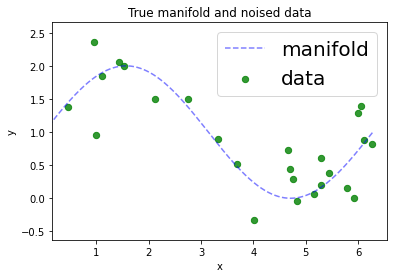

In [ ]:
#Отрисовка графика

margin = 0.3
plt.plot(data['points'],data['values'],'b--',alpha=0.5, label='manifold')
plt.scatter(data['x_train'],data['y_train'],40,'g','o',alpha=0.8,label = 'data')
plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin) # это пределы отрисировки по x
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin) # по y
plt.legend(loc='upper right', prop={'size': 20})
plt.title('True manifold and noised data')
plt.xlabel('x') #подспись по x
plt.ylabel('y') #подпись по y
plt.show()

Теперь опишем сам алгоритм через NumPy

In [ ]:

#матрица признаков X (rows - наблюдения, cols - features)
X = np.array([np.ones(data['x_train'].shape[0]),data['x_train']]).T #добавляем столбец единиц, так необходимо учитывать еще константу
#вектор весов W (по сути процесс обучения)
W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,data['y_train']))


In [ ]:
X.shape

(25, 2)

In [ ]:
#оценка вектора Y
Y_est = np.dot(X,W) 

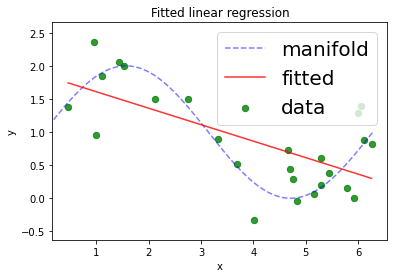

In [ ]:
margin=0.3

plt.plot(data['points'],data['values'],'b--',alpha=0.5,label='manifold')
plt.scatter(data['x_train'],data['y_train'],40,'g','o',alpha=0.8,label='data')

plt.plot(data['x_train'],Y_est,'r',alpha=0.8,label='fitted')

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted linear regression')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
import math as m

In [ ]:
#посчитаем rmse

# rmse_t = m.sqrt(sum((data['values']-Y_est)**2)/data['values'].shape[0])
rmse_f = m.sqrt(sum((data['y_train']-Y_est)**2)/data['y_train'].shape[0])
# rmse_t,

rmse_f

0.5411015528879808

# Полиномиальная регрессия

В линейной регрессии мы ограничивали пространство гипотез только линейными функциями от признаков. Давайте теперь расширим пространство гипотез до всех полиномов степени $p$. Тогда в нашем случае, когда количество признаков равно одному $m=1$, пространство гипотез будет выглядеть следующим образом:
$\Large \begin{array}{rcl} \forall h \in \mathcal{H}, h\left(x\right) &=& w_0 + w_1 x + w_1 x^2 + \cdots + w_n x^p \\ &=& \sum_{i=0}^p w_i x^i \end{array}$


Отрисуем кривые полиномов разных степеней

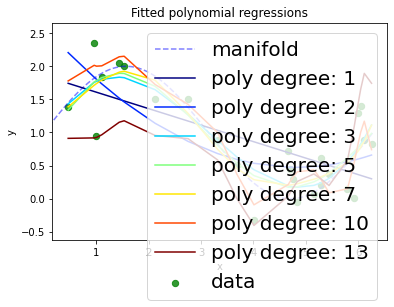

In [ ]:
#список степеней p полиномов
degree_list = [1,2,3,5,7,10,13]

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0,1,len(degree_list))]

margin = 0.3
plt.plot(data['points'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

W_list = []
err = []

for ix,degree in enumerate(degree_list):
  #список с предрасчитанными степенями признака
  dlist = [np.ones(data['x_train'].shape[0])] +  list(map(lambda n: data['x_train']**n,range(1,degree +1)))
  X = np.array(dlist).T
  W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,data['y_train']))
  W_list.append((degree,W))
  Y_est = np.dot(X,W)
  err.append(np.mean((data['y_train'] - Y_est)**2))
  plt.plot(data['x_train'],Y_est,color = colors[ix],label = 'poly degree: %i' %degree)

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [ ]:
#@title Plotly
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
#список степеней p полиномов
degree_list = [1,2,3,5,7,10,13]

cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0,1,len(degree_list))]

margin = 0.3
fig1 = go.Figure()
fig1.update_yaxes(range=[data['x_train'].min() - margin, data['x_train'].max() + margin])
fig1.update_xaxes(range=[data['y_train'].min() - margin, data['y_train'].max() + margin])
fig1.add_trace(go.Scatter(x=data['points'], y=data['values'], mode = 'lines', marker=dict(line = dict(color='Blue',width=3)), name='manifold'))
fig1.add_trace(go.Scatter(x=data['x_train'], y=data['y_train'], mode='markers', marker=dict(color='Green', size=5) ,name='data'))


W_list = []
err = []

for ix,degree in enumerate(degree_list):
  #список с предрасчитанными степенями признака
  dlist = [np.ones(data['x_train'].shape[0])] +  list(map(lambda n: data['x_train']**n,range(1,degree +1)))
  X = np.array(dlist).T
  W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,data['y_train']))
  W_list.append((degree,W))
  Y_est = np.dot(X,W)
  err.append(np.mean((data['y_train'] - Y_est)**2))
  fig1.add_trace(go.Scatter(x=data['x_train'], y=Y_est, mode = 'lines', marker=dict(line = dict(color=colors[ix],width=3)), name='poly degree: %i' %degree))


fig1.update_layout(
                  title="Fitted polynomial regressions",
                  xaxis_title="x",
                  yaxis_title="y",
                  margin=dict(l=0, r=30, t=30, b=30),
                  )
fig1.update_traces(hoverinfo="x+y")
fig1.show()

In [ ]:
err

[0.2927908905377843,
 0.23774993096590646,
 0.14651600239763266,
 0.14314163043061437,
 0.14028934937002335,
 0.1263523015841026,
 0.3924727500009954]

#Это явный признак переобучения, который можно заметить по визуализации даже не используя тестовый набор данных: при увеличении степени полинома выше третьей модель начинает интерполировать данные, вместо экстраполяции. Другими словами, график функции проходит точно через точки из тренировочного набора данных, причем чем выше степень полинома, тем через большее количество точек он проходит. Степень полинома отражает сложность модели. Таким образом, сложные модели, у которых степеней свободы достаточно много, могут попросту запомнить весь тренировочный набор, полностью теряя обобщающую способность. Это и есть проявление негативной стороны принципа минимизации эмпирического риска.

Рассчитаем число обусловленности матрицы тренировочного набор X


In [ ]:
np.linalg.eigvals(np.cov(X[:,1:].T))

array([ 4.29695418e+19,  1.28229548e+15,  3.28920327e+11,  1.43555233e+08,
        2.13053418e+05,  5.39379766e+02, -6.71130754e+00,  5.18890226e+00,
        1.00106338e-01,  6.94029718e-03,  1.33261439e-03,  1.51925053e-04,
        1.22013608e-05])

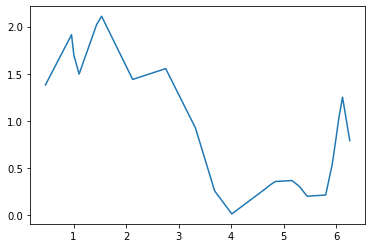

In [ ]:
#пофиксим

degree = 13
dlist = [np.ones(data['x_train'].shape[0])] + list(map(lambda n: data['x_train']**n,range(1,degree)))
X = np.array(dlist).T

q,r = np.linalg.qr(X)

y_est = np.dot(np.dot(q,q.T),data['y_train'])
plt.plot(data['x_train'],y_est,label = 'poly degree: %i' % degree)

In [ ]:
#разобранный пример визуализации дальше
for ix, t in enumerate(W_list):
    degree, W = t
    print(degree,W)
    print([0]*(max(degree_list) - W.shape[0] + 1))
    print('\n\n\n')

1 [ 1.85875784 -0.24895558]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]




2 [ 2.59574649 -0.87855226  0.09094532]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]




3 [ 0.85339888  1.56546637 -0.72408609  0.07678961]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]




5 [ 0.67436339  1.70403306 -0.55668103 -0.07242998  0.03563473 -0.00265208]
[0, 0, 0, 0, 0, 0, 0, 0]




7 [ 1.10853756e+00  5.20193744e-01  1.42786173e-01  1.78336241e-01
 -3.13698362e-01  1.14822882e-01 -1.65845942e-02  8.58366082e-04]
[0, 0, 0, 0, 0, 0]




10 [-2.51059489e+01  1.57649591e+02 -3.70968380e+02  4.70300713e+02
 -3.58661152e+02  1.73402618e+02 -5.42890706e+01  1.09528229e+01
 -1.37218705e+00  9.69857443e-02 -2.95252760e-03]
[0, 0, 0]




13 [-1.25134130e+01  7.98402233e+01 -1.87187824e+02  2.27586765e+02
 -1.56449928e+02  6.04842529e+01 -1.07314358e+01 -7.25179315e-01
  7.58596852e-01 -1.49911866e-01  1.14808250e-02  1.59046380e-04
 -7.52049236e-05  3.18930552e-06]
[]






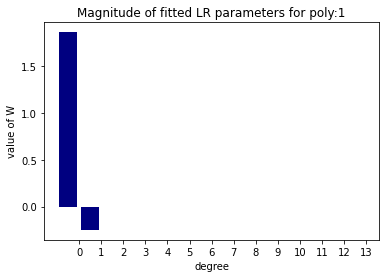

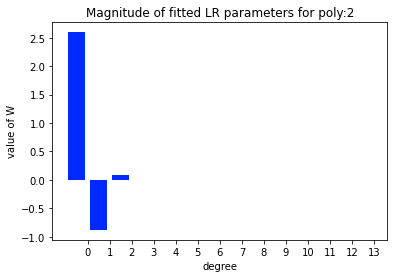

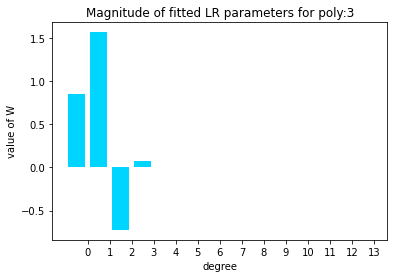

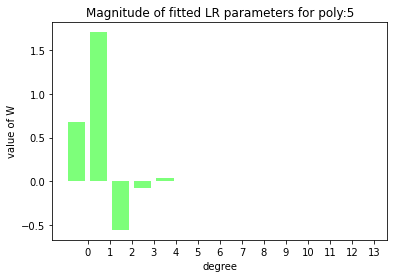

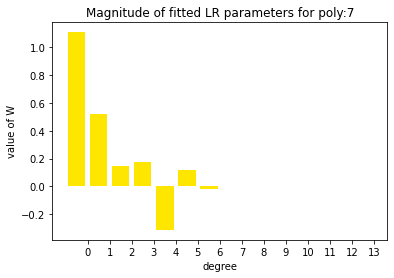

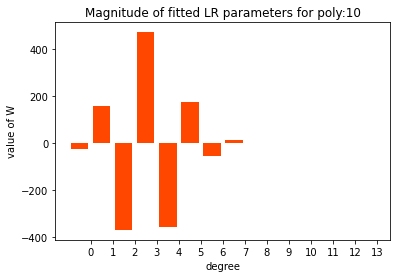

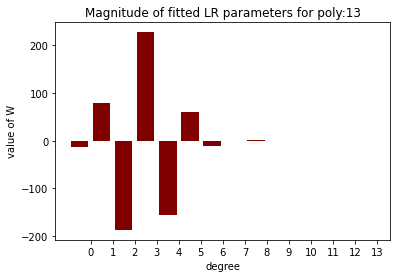

In [ ]:
#визуализация коэффициентов обученных полиномов

for ix, t in enumerate(W_list):
    degree, W = t
    fig, ax = plt.subplots()
    plt.bar(range(max(degree_list) + 1), np.hstack((W, [0]*(max(degree_list) - W.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of W')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

#$L^2$ Регуляризация

Регуляризация — это способ уменьшить сложность модели чтобы предотвратить переобучение или исправить некорректно поставленную задачу. Обычно это достигается добавлением некоторой априорной информации к условию задачи. Например так:
$\Large \mathcal{L}_{reg} \left(X, \vec{y}, \vec{w}\right) = \mathcal{L}\left(X, \vec{y}, \vec{w}\right) + \lambda R\left(\vec{w}\right)$


$\lambda$ — это коэффициент регуляризации, то, насколько сильно мы хотим учитывать условие $R$

На графиках мы увидели, что амплитуда значений коэффициентов слишком большая, попробуем ее уменьшить, добавив ограничение на $L^2$ норму вектора параметров.
$\Large R\left(\vec{w}\right) = \frac{1}{2} \left\| \vec{w} \right\|_2^2 = \frac{1}{2} \sum_{j=1}^m w_j^2 = \frac{1}{2} \vec{w}^T \vec{w}$


Новая функция стоимости примет вид:
$\Large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}$


Вычислим производную по параметрам:
$\Large \begin{array}{rcl}\Large \frac{\partial \mathcal{L}}{\partial \vec{w}} &=& \frac{\partial}{\partial \vec{w}} \left(\frac{1}{2} \left(\vec{y} - X \vec{w}\right)^T \left(\vec{y} - X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w}\right) \\ &=& \frac{\partial}{\partial \vec{w}}\left( \frac{1}{2} \left( \vec{y}^T \vec{y} -2\vec{y}^T X \vec{w} + \vec{w}^T X^T X \vec{w}\right) + \frac{\lambda}{2} \vec{w}^T \vec{w} \right) \\ &=& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} \end{array}$


И найдем решение в явном виде:
$\Large \begin{array}{rcl} \frac{\partial \mathcal{L}}{\partial \vec{w}} = 0 &\Leftrightarrow& -X^T \vec{y} + X^T X \vec{w} + \lambda \vec{w} = 0 \\ &\Leftrightarrow& X^T X \vec{w} + \lambda \vec{w} = X^T \vec{y} \\ &\Leftrightarrow& \left(X^T X + \lambda E\right) \vec{w} = X^T \vec{y} \\ &\Leftrightarrow& \vec{w} = \left(X^T X + \lambda E\right)^{-1} X^T \vec{y} \end{array}$


$E$ — единичная диагональна матрица

Такая регрессия называется гребневой регрессией (ridge regression). А гребнем является как раз диагональная матрица которую мы прибавляем к матрице$X^T X$ с линейнозависимыми колонками, в результате получаемая матрица не сингулярна.




Для такой матрицы число обусловленности будет равно: $\frac{e_\text{max} + \lambda}{e_\text{min} + \lambda}$, где $e_x$ — это собственные числа матрицы. Таким образом, увеличивая параметр регуляризации мы уменьшаем число обусловленности, а обусловленность задачи улучшается.


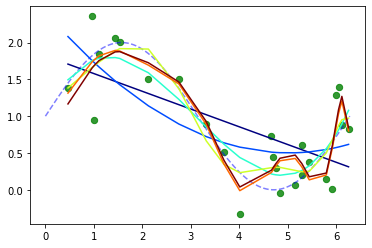

In [ ]:
lmbd =0.1

degree_list= [1,2,3,10,12,13]
cmap=plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0,1,len(degree_list))]

margin =0.3
plt.plot(data['points'], data['values'], 'b--', alpha=0.5, label='manifold')
plt.scatter(data['x_train'], data['y_train'], 40, 'g', 'o', alpha=0.8, label='data')

W_list_l2 = []
err = []
for ix,degree in enumerate(degree_list):
  dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1, degree + 1)))
  X = np.array(dlist).T
  W = np.dot(np.linalg.inv(np.dot(X.T,X)+np.dot(lmbd,np.eye(X.shape[1]))),np.dot(X.T,data['y_train']))
  W_list_l2.append((degree,W))
  Y_est = np.dot(X,W)
  plt.plot(data['x_train'], Y_est, color = colors[ix],label='poly degree: %i' % degree)
  err.append(np.mean((data['y_train']-Y_est)**2))

In [ ]:
err

[0.2930862379184833,
 0.23981062520887847,
 0.14731465406542393,
 0.13156350346862417,
 0.1108029186131566,
 0.11449283371719156]

#В результате даже 13-ая степень ведет себя так, как мы ожидаем. Графики немного сгладились, хотя мы все равно наблюдаем небольшое переобучение на степенях выше третьей, что выражается в интерполяции данных в правой части графика.


Визуализация коэффициентов

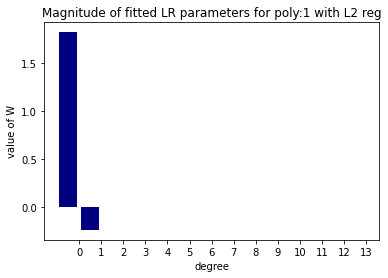

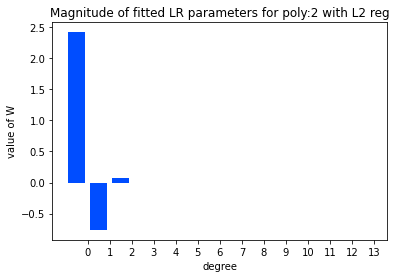

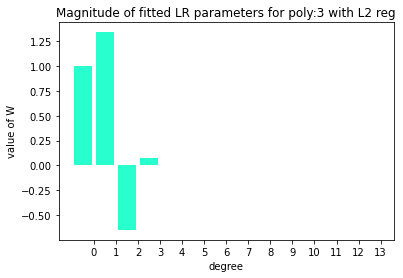

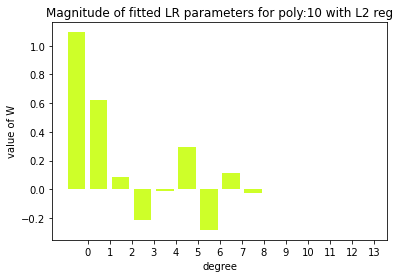

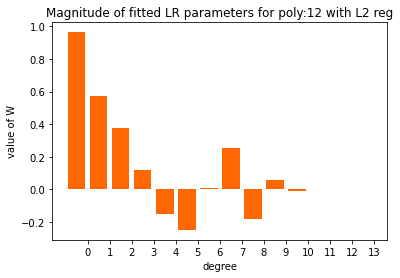

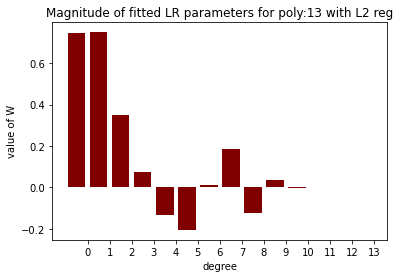

In [ ]:
for ix, t in enumerate(W_list_l2):
  degree,W=t
  fig,ax = plt.subplots()
  plt.bar(range(max(degree_list) + 1), np.hstack((W, [0]*(max(degree_list) - W.shape[0] + 1))), color=colors[ix])
  plt.title('Magnitude of fitted LR parameters for poly:%i with L2 reg' % degree)
  plt.xlabel('degree')
  plt.ylabel('value of W')
  ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
  ax.set_xticklabels(range(max(degree_list) + 1))
  plt.show()

#L1 регуляризация (LASSO)
Попробуем теперь ограничить вектор параметров модели, используя $L_1$ норму:
$\Large R\left(\vec{w}\right) = \left\| \vec{w} \right\|_1 = \sum_{j=1}^m \left| w_j \right|$

Тогда задача примет вид:
$\Large \mathcal{L}\left(X, \vec{y}, \vec{w} \right) = \frac{1}{2n} \sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right)^2 + \lambda \sum_{j=1}^m \left| w_j \right|$


Посчитаем производную по параметрам модели (надеюсь уважаемые господа не будут пинать меня, за то, что я вжух и взял производную по модулю):
$\Large \frac{\partial \mathcal{L}}{\partial w_j} = \frac{1}{n}\sum_{i=1}^n \left(\vec{x_i}^T \vec{w} - y_i\right) \vec{x_i} + \lambda \text{sign}(w_j)$


К сожалению, такая задача не имеет решения в явном виде. Для поиска хорошего приближенного решения мы воспользуемся методом градиентного спуска, тогда формула обновления весов примет вид:
$\Large \vec{w}_{\text{new}} := \vec{w} - \alpha \frac{\partial \mathcal{L}}{\partial \vec{w}}$


а в задаче появляется еще один гиперпараметр $\alpha$, отвечающий за скорость спуска, его в машинном обучении называют скоростью обучения (learning rate).

In [ ]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n, range(1,degree+1)))
X = np.array(dlist).T

#функция вычисления среднего квадрата ошибки
def mse(u,v):
  return ((u-v)**2).sum()/u.shape[0]

# начальное приближение
W = np.array([-1.0] * X.shape[1])
#максимальное количество итераций
n_iter = 20
# выберем скорость обучения (возьмем для начала 1e-8)
lr = 1e-8
loss = []
for ix in range(n_iter):
  W -= lr*(np.dot(np.dot(X,W)- data['y_train'],X)/X.shape[0] + lmbd*np.sign(W))
  Y_est = np.dot(X,W)
  loss.append(mse(data['y_train'], Y_est))
  print(loss[-1])

2.671664365300119e+43
8.884313435646091e+66
2.9543765395073135e+90
9.824440346927556e+113
3.2670049616097404e+137
1.0864050309512617e+161
3.612715331459611e+184
1.2013670495188315e+208
3.995008339299368e+231
1.3284942047864384e+255
4.417755114024802e+278
1.4690737962706926e+302
inf
inf
inf
inf
inf
inf
inf
inf


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning:

overflow encountered in square



Необходимо провести z-стандартизацию данных, дабы избежать разных масштабов входных признаков



$\Large \begin{array}{rcl} \overline{\mu}_{\cdot j} &=& \frac{1}{n} \sum_{i=1}^n x_{ij} \\ \overline{\sigma}_{\cdot j} &=& \sqrt{\frac{1}{n} \sum_{i=1}^n \left( x_{ij} - \overline{\mu}_{\cdot j} \right)^2} \end{array}$
$\Large \vec{x}_{\text{new}} = \frac{\vec{x} - \overline{\mu}}{\overline{\sigma}}$

In [ ]:
X.max(axis=0)

array([1.00000000e+00, 6.25802741e+00, 3.91629070e+01, 2.45082546e+02,
       1.53373329e+03, 9.59814495e+03, 6.00654542e+04, 3.75891259e+05,
       2.35233780e+06, 1.47209944e+07, 9.21243865e+07, 5.76516936e+08,
       3.60785879e+09, 2.25780792e+10])

In [ ]:
X[:,1:] = (X[:,1:] - X[:,1:].mean(axis=0))/X[:,1:].std(axis=0)

In [ ]:
X.max(axis=0)

array([1.        , 1.21017067, 1.48077245, 1.71051167, 1.9038023 ,
       2.06882567, 2.21270718, 2.34078551, 2.45692734, 2.5639126 ,
       2.66373481, 2.75782081, 2.8471902 , 2.93257047])

In [ ]:
%config InlineBacked.figure_format = 'svg' #более четкие график

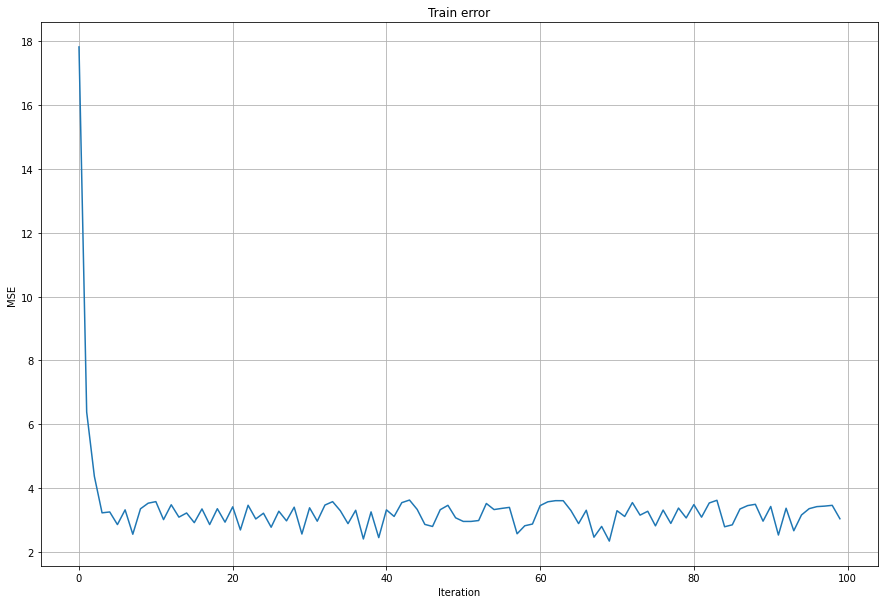

In [ ]:
lmbd = 1
degree = 13
dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n,range(1,13+1)))
X = np.array(dlist).T
#проведем z-стандартизацию
X[:,1:] = (X[:,1:] - X[:,1:].mean(axis=0))/X[:,1:].std(axis=0)

#зададим начальное приближение вектору весов
W = np.array([-1.0]*X.shape[1])
n_iter = 100
lr = 0.1
loss = []
for ix in range(n_iter):
  W -= lr*(np.dot(np.dot(X,W)-data['y_train'],X)/X.shape[0] + lmbd*np.sign(W))
  Y_est = np.dot(X,W)
  loss.append(mse(data['y_train'], Y_est))

plt.figure(figsize=(15,10))
plt.plot(loss)
plt.title('Train error')
plt.xlabel('Iteration')
plt.ylabel('MSE')
plt.grid()
plt.show()

Проделаем тоже самое для всех степеней полинома

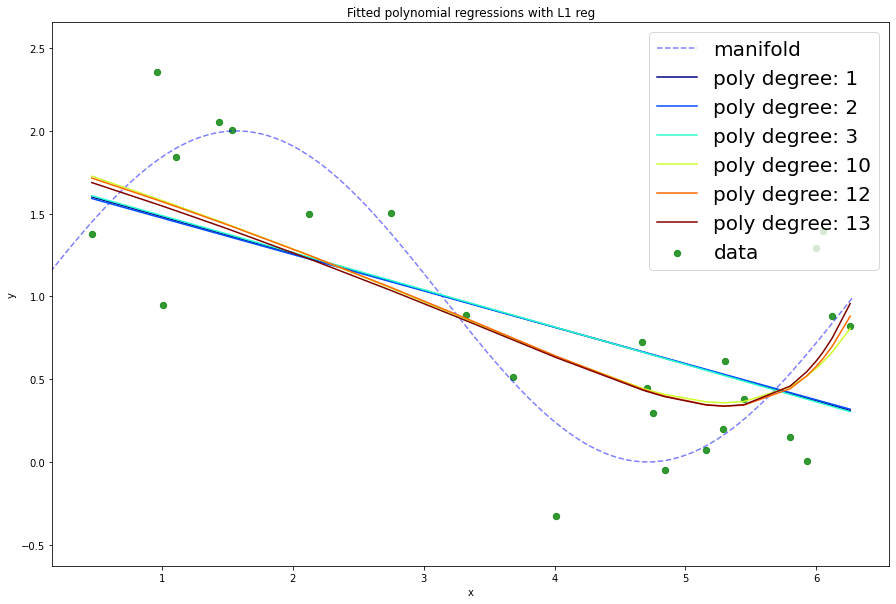

In [ ]:
degree_list = [1,2,3, 10, 12, 13]
cmap = plt.get_cmap('jet')
colors = [cmap(i) for i in np.linspace(0,1,len(degree_list))]

margin = 0.3
plt.figure(figsize=(15,10))
plt.plot(data['points'],data['values'],'b--',alpha=0.5, label = 'manifold')
plt.scatter(data['x_train'],data['y_train'],40,'g','o',alpha=0.8,label = 'data')

def mse(u, v):
    return ((u - v)**2).sum()/u.shape[0]

def fit_lr_l1(X,Y,lmbd, n_iter=100, lr=0.1):
  W = np.array([-1.0]*X.shape[1])
  loss = []
  for ix_iter in range(n_iter):
    W -= lr*(np.dot(np.dot(X,W)-Y,X)/X.shape[0] + lmbd * np.sign(W))
    Y_est = np.dot(X,W)
    loss.append(mse(Y,Y_est))
  return W,Y_est,loss

err= []
W_list_l1 = []
for ix,degree in enumerate(degree_list):
  dlist = [[1]*data['x_train'].shape[0]] + list(map(lambda n: data['x_train']**n,range(1,degree+1)))
  X = np.array(dlist).T
  X[:,1:] = (X[:,1:] - X[:,1:].mean(axis=0))/X[:,1:].std(axis=0)
  W,Y_est,loss = fit_lr_l1(X,data['y_train'],lmbd=0.05)
  W_list_l1.append((degree,W))
  plt.plot(data['x_train'], Y_est, color = colors[ix], label='poly degree: %i' % degree)
  err.append(np.mean((data['y_train']-Y_est)**2))

plt.xlim(data['x_train'].min() - margin, data['x_train'].max() + margin)
plt.ylim(data['y_train'].min() - margin, data['y_train'].max() + margin)
plt.legend(loc='upper right', prop={'size': 20})
plt.title('Fitted polynomial regressions with L1 reg')
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

In [ ]:
err

[0.29779392466958815,
 0.2982499212592474,
 0.29784592869055365,
 0.20617375848746491,
 0.20364532661476645,
 0.20369989447579878]

Визуализируем коэффициенты W

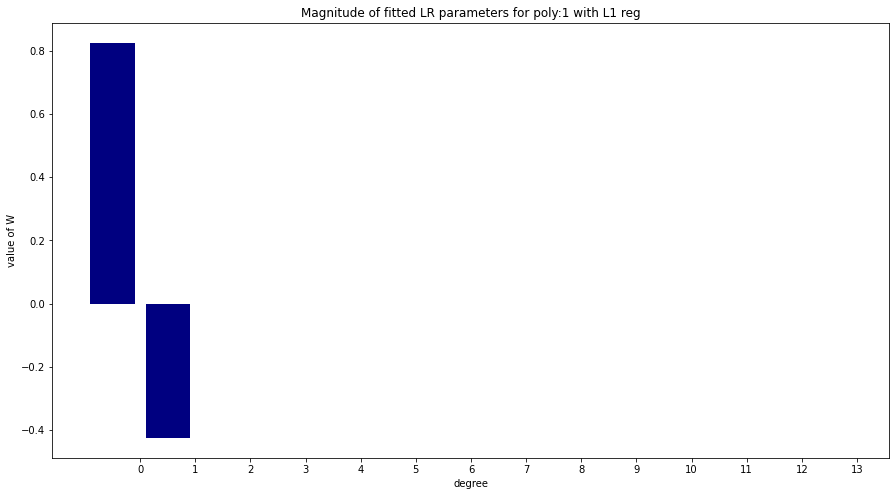

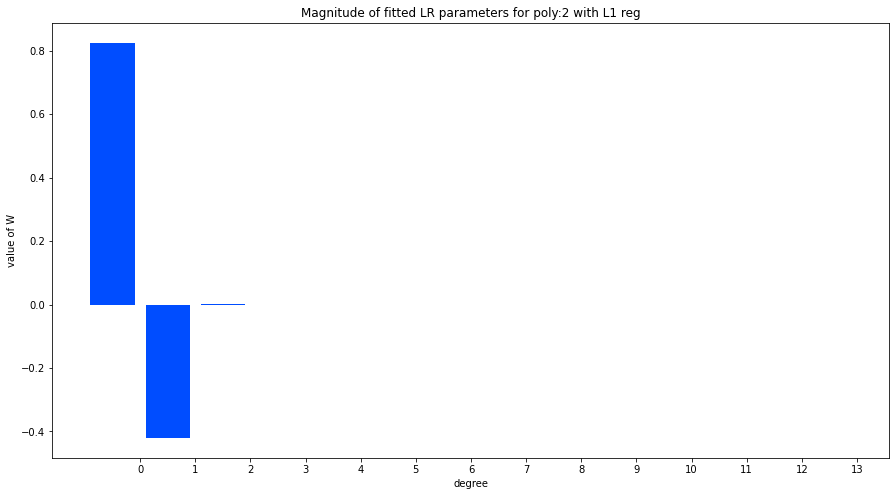

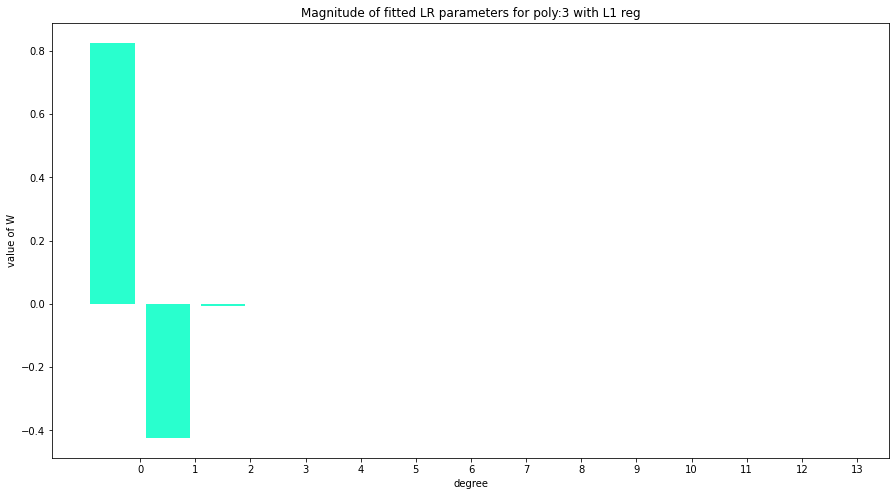

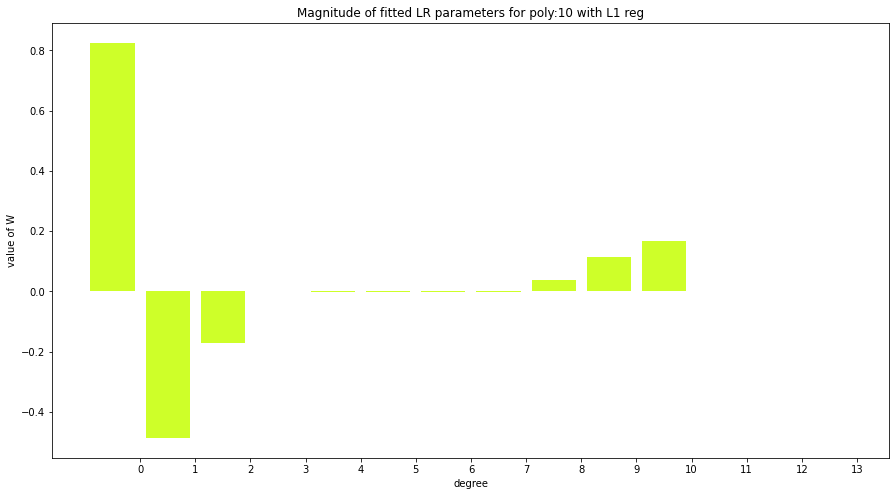

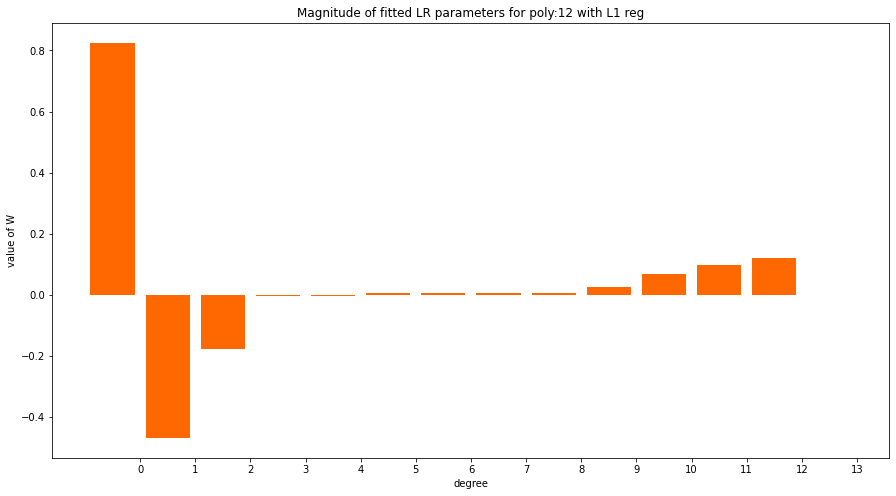

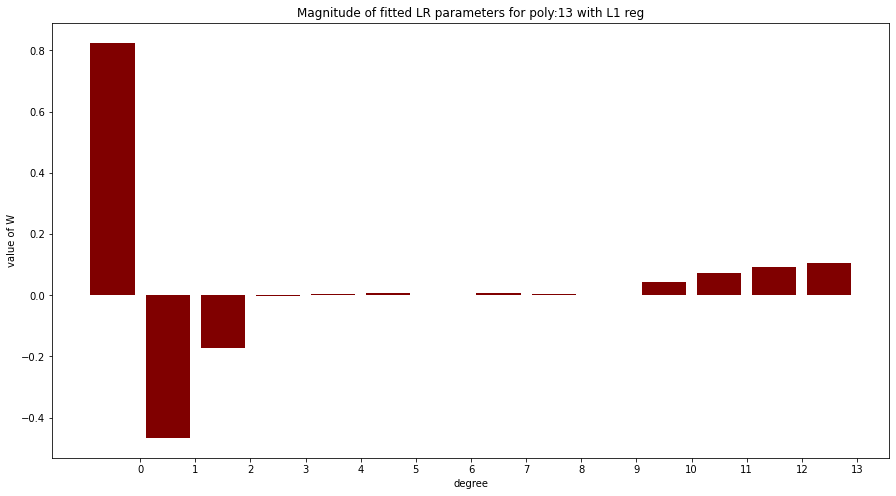

In [ ]:
for ix, t in enumerate(W_list_l1):
    degree, W = t
    fig, ax = plt.subplots(figsize=(15,8))
    plt.bar(range(max(degree_list) + 1), np.hstack((W, [0]*(max(degree_list) - W.shape[0] + 1))), color=colors[ix])
    plt.title('Magnitude of fitted LR parameters for poly:%i with L1 reg' % degree)
    plt.xlabel('degree')
    plt.ylabel('value of W')
    ax.set_xticks(np.array(range(max(degree_list) + 1)) + 0.5)
    ax.set_xticklabels(range(max(degree_list) + 1))
    plt.show()

#Байесовская интерпретация линейной регрессии

$\Large \color{green}{p\left(y \mid x\right)} = \dfrac{\color{orange}{p\left(x \mid y\right)} \color{blue}{p\left(y\right)}}{\color{red}{p\left(x\right)}}$

$\color{blue}{p\left(y\right)}$ — априорные ожидания (prior): насколько правдоподобна гипотеза перед наблюдением данных;

$\color{orange}{p\left(x \mid y\right)}$ — правдоподобие (likelihood): насколько правдоподобны данные при условии того, что гипотеза верна;

$\color{red}{p\left(x\right) = \sum_{z} p\left(x \mid z\right) p\left(z\right)}
$ — маргинальная вероятность (marginal probability или evidence): вероятность данных, усредненная по всевозможным гипотезам;

$\color{green}{p\left(y \mid x\right)}$ — апостериорное распределение (posterior): насколько правдоподобна гипотеза при наблюдаемых данных.


В статистике обычно ищут точечную оценку максимума правдоподобия (ML = maximum likelihood):
$\Large \theta_{\text{ML}} = \arg \max_{\theta} p\left(D \mid \theta\right)$



В то время как в байесовом подходе интересуются апостериорным распределением:
$\Large p\left(\theta \mid D \right) \propto p\left(D \mid \theta\right) p\left( \theta \right)$



Часто получается так, что интеграл, полученный в результате байесового вывода, крайне нетривиален (в случае линейной регрессии это, к счастью, не так), и тогда нужна точечная оценка. Тогда мы интересуемся максимумом апостериорного распределения (MAP = maximum a posteriori):

$\Large \theta_{\text{MAP}} = \arg \max_{\theta} p\left(\theta \mid D\right) = \arg \max_{\theta} p\left( D \mid \theta\right) p\left(\theta\right)$



Давайте сравним ML и MAP гипотезы для линейной регрессии, это даст нам четкое понимание смысла регуляризаций. Будем считать, что все объекты из обучающей выборки были взяты из общей популяции независимо и равномерно распределенно. Это позволит нам записать совместную вероятность данных (правдоподобие) в виде:
$\Large p(D) = \prod_{i=1}^n p(x_i)$



А также будем считать, что целевая переменная подчиняется следующему закону:
$\Large y = \vec{w}^T \vec{x} + \epsilon, \epsilon \sim \mathcal{N}\left(0, \sigma^2\right)$


или
$\Large p\left(y \mid \vec{x}, \vec{w}, \sigma^2\right) = \mathcal{N}\left(y \mid \vec{w}^T \vec{x}, \sigma^2\right)$


Т.е. верное значение целевой переменной складывается из значения детерминированной линейной функции и некоторой непрогнозируемой случайной ошибки, с нулевым матожиданием и некоторой дисперсией. Тогда, мы можем записать правдоподобие данных как:
$\Large p\left(\vec{y} \mid X, \vec{w}, \sigma^2\right) = \prod_{i=1}^n \mathcal{N}\left(y_i \mid \vec{w}^T \vec{x}_i, \sigma^2\right)$


удобнее будет прологарифмировать это выражение:
$\Large \begin{array}{rcl}\mathcal{L} &=& \ln p\left(\vec{y} \mid X, \vec{w}, \sigma^2\right) \\ &=& \ln \prod_{i=1}^n \mathcal{N}\left(y_i \mid \vec{w}^T \vec{x}_i, \sigma^2\right) \\ &=& \ln \frac{1}{\left(\sigma \sqrt{2\pi}\right)^n} e^{-\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2} \\ &=& -\frac{n}{2}\ln 2\pi\sigma^2 -\frac{1}{2\sigma^2} \sum_{i=1}^n \left(y_i - \vec{w}^T \vec{x}_i\right)^2 \end{array}$

In [ ]:
data = generate_wave_set(1000,100)
X = np.vstack((np.ones(data['x_train'].shape[0]),data['x_train'])).T
W = np.dot(np.linalg.inv(np.dot(X.T,X)),np.dot(X.T,data['y_train']))

In [ ]:
import itertools as it
%config InlineBacked.figure_format = 'svg' #более четкие график

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



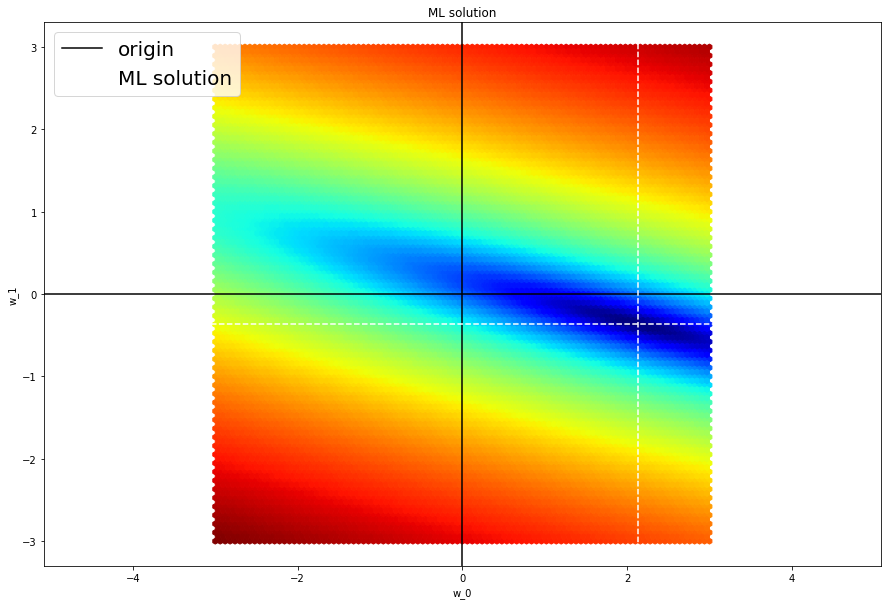

In [ ]:
w0_points = np.linspace(-3,3,1000)
w1_points = np.linspace(-3,3,1000)
wx_space = list(it.product(w0_points, w1_points))

w0,w1 = zip(*wx_space) #объединяет в кортежи

y = ((data['y_train'][:,np.newaxis] - np.dot(X,np.array(wx_space).T))**2).mean(axis=0)

plt.figure(figsize=(15,10))
#тепловая карта (напоминат диаграмму рассеивания)
plt.hexbin(w0, w1, C=y**(0.2), cmap=plt.get_cmap('rgb'),bins=None)
#добавим линии трасировки
plt.axvline(0, color='black', linestyle='-', label='origin')
plt.axhline(0, color='black', linestyle='-')
plt.axvline(W[0], color='w', linestyle='--', label='ML solution')
plt.axhline(W[1], color='w', linestyle='--')
plt.axes().set_aspect('equal', 'datalim')
plt.title('ML solution')
plt.xlabel('w_0')
plt.ylabel('w_1')
plt.legend(loc='upper left', prop={'size': 20})
plt.show()

ML решение находится на самом пике, где правдоподобие максимально.

Найдем MAP оценку параметров линейной регрессии, для этого придется задать какое-нибудь априорное распределение на параметры модели. Пусть для начала это будет опять нормальное распределение: $p\left(\vec{w}\right) = \mathcal{N}\left(\vec{w} \mid 0, \sigma_0^2 E\right)$.

$\Large p\left(x \mid \mu, \sigma\right) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\dfrac{\left(x - \mu\right)^2}{2\sigma^2}}$

In [ ]:
import scipy.stats as st

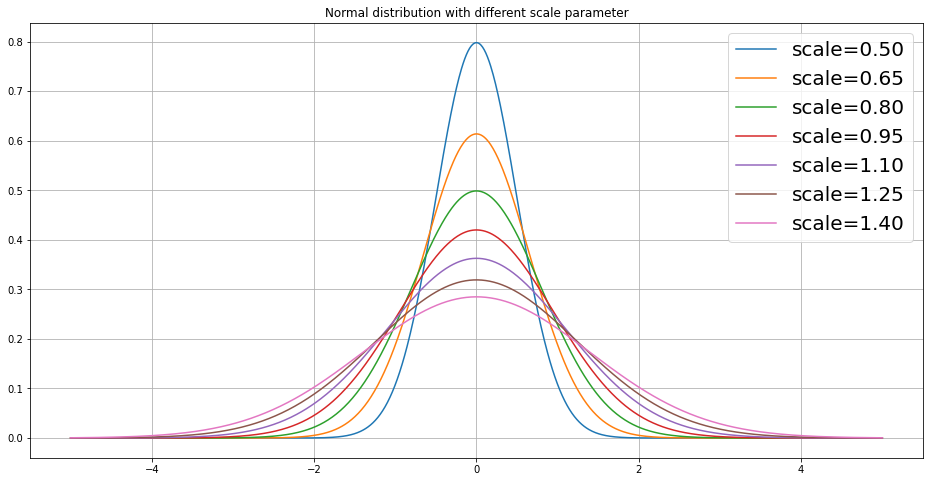

In [ ]:
#строим нормальное распределение
x = np.linspace(-5,5,1000)

plt.figure(figsize=(16,8))
for scale in np.linspace(0.5,1.4,7):
  plt.plot(x,st.norm.pdf(x,scale=scale),label = 'scale=%0.2f' % scale)

plt.legend(loc='upper right', prop={'size': 20})
plt.title('Normal distribution with different scale parameter')
plt.grid()
plt.show()

Тогда апостериорное распределение примет вид:
$\Large p\left(\vec{w} \mid \vec{y}, X, \sigma^2\right) \propto \mathcal{N}\left(\vec{w} \mid 0, \sigma_0^2 E\right) \prod_{i=1}^n \mathcal{N}\left(y_i \mid \vec{w}^T \vec{x}_i, \sigma^2\right)$


Если расписать логарифм этого выражения, то вы легко увидите, что добавление нормального априорного распределения — это то же самое, что и добавление $L_2$ нормы к функции стоимости.